<a href="https://colab.research.google.com/github/pambudilanggeng/PortoProject/blob/main/Notebook_dicoding_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: AirQualityDataDinglingFeb2017
- Nama: Langgeng Pambudi
- Email: ku.langgeng@gmail.com
- Id Dicoding: KEXLL7GW4XG2
- Data Set Referensi : https://github.com/marceloreis/HTI/tree/master/PRSA_Data_20130301-20170228

# Latar Belakang



Berdasarkan data Global Burden Diseases 2019 Diseases and Injuries Collaborators terdapat 5 penyakit respirasi penyebab kematian tertinggi di dunia, yakni penyakit paru obstruktif kronis (PPOK), pneumonia, kanker paru, tuberkulosis,  dan asma ([GBD dalam Kemenkes 2023](https://sehatnegeriku.kemkes.go.id/baca/rilis-media/20230404/2642721/polusi-udara-sebabkan-angka-penyakit-respirasi-tinggi/). Penyakit respirasi tersebut salah satunya bisa diakibatkan oleh terapaparnya tubuh oleh polusi udara.

Polusi udara telah menjadi salah satu tantangan lingkungan dalam era modern saat ini. Polusi udara tidak hanya berasal dari kendaraan bermotor, tetapi juga dari asap pabrik. Polusi udara memiliki dampak signifikan terhadap kualitas udara yang kita hirup dan kesehatan kita secara keseluruhan ([Kemenkes 2023](https://ayosehat.kemkes.go.id/penting-pahami-ancaman-polusi-udara-pada-kesehatan))



## Menentukan Pertanyaan

- Bagaimana tren polusi PM 2.5 Feb tahun 2017 di Wanliu?
- Bagaimana tren hujan tahun Feb 2017 di Wanliu?
- Bagaimana hubungan antara polusi PM 2.5 dengan hujan?

Menyiapkan semua library yang dibutuhkan

---



In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg
from scipy import stats

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project00_langgeng_Intan/project-00/data science-dicoding/project_submission/RawData/PRSA_Data_Wanliu_20130301-20170228.csv')


print(df.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [ ]:
df_2017 = df[df['year'] == 2017]
filtered_data = df_2017.loc[(df_2017['year'] == 2017) & (df_2017['month'] == 2)]

filtered_data


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
34392,34393,2017,2,1,0,15.0,19.0,9.0,28.0,700.0,63.0,-0.8,1027.8,-21.6,0.0,NNE,1.7,Wanliu
34393,34394,2017,2,1,1,10.0,44.0,7.0,27.0,800.0,63.0,-1.0,1028.5,-21.2,0.0,NNE,2.5,Wanliu
34394,34395,2017,2,1,2,7.0,40.0,7.0,20.0,700.0,63.0,-1.4,1029.2,-22.1,0.0,NNE,2.2,Wanliu
34395,34396,2017,2,1,3,9.0,27.0,7.0,18.0,600.0,63.0,-1.7,1029.9,-22.4,0.0,NE,2.7,Wanliu
34396,34397,2017,2,1,4,9.0,22.0,7.0,20.0,600.0,63.0,-2.0,1030.4,-22.6,0.0,NNE,2.3,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


### Assessing Data

In [ ]:

#mengisi missing value
filtered_data.fillna(0, inplace=True)

#mengecek missing data
missing_values = filtered_data.isna()
missing_count = missing_values.sum()


print(missing_values)
print(missing_count)


          No   year  month    day   hour  PM2.5   PM10    SO2    NO2     CO  \
34392  False  False  False  False  False  False  False  False  False  False   
34393  False  False  False  False  False  False  False  False  False  False   
34394  False  False  False  False  False  False  False  False  False  False   
34395  False  False  False  False  False  False  False  False  False  False   
34396  False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
35059  False  False  False  False  False  False  False  False  False  False   
35060  False  False  False  False  False  False  False  False  False  False   
35061  False  False  False  False  False  False  False  False  False  False   
35062  False  False  False  False  False  False  False  False  False  False   
35063  False  False  False  False  False  False  False  False  False  False   

          O3   TEMP   PRES   DEWP   RAIN     wd   W

<ipython-input-6-be60f84e9d64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.fillna(0, inplace=True)


In [ ]:
#mengecek duplikat data
df.duplicated().sum()

0

In [ ]:
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,34941,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanliu
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6703,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,NaN,1.501215,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,NaN,1.104472,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,NaN,0.800000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,NaN,1.200000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,NaN,2.000000,NaN


### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Deskriptif untuk PM2.5:
count    672.000000
mean      68.284226
std       79.389142
min        0.000000
25%        9.000000
50%       27.500000
75%      100.250000
max      352.000000
Name: PM2.5, dtype: float64

Statistik Deskriptif untuk RAIN:
count    672.000000
mean       0.006101
std        0.064655
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: RAIN, dtype: float64


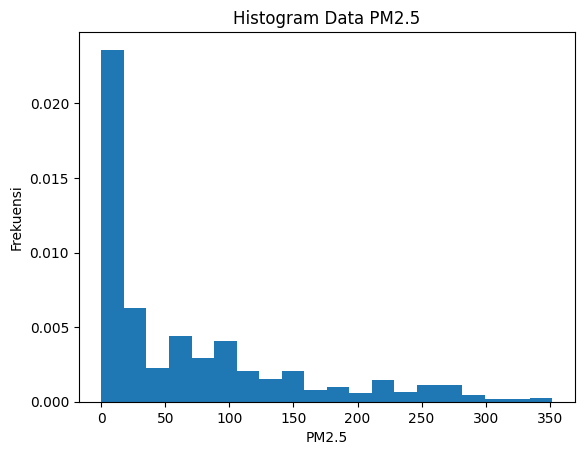

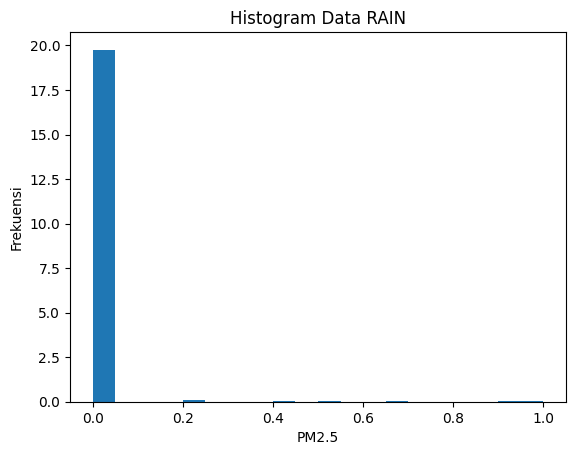

In [ ]:
# Menghitung statistik deskriptif untuk kolom "PM2.5" dan "RAIN"
statistics_pm25 = filtered_data['PM2.5'].describe()
statistics_rain = filtered_data['RAIN'].describe()

# Menampilkan hasil statistik deskriptif
print("Statistik Deskriptif untuk PM2.5:")
print(statistics_pm25)

print("\nStatistik Deskriptif untuk RAIN:")
print(statistics_rain)


#cek distribusi data PM2.5

plt.hist(filtered_data['PM2.5'], bins=20, density=True)
plt.title('Histogram Data PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

#Modus Lebih Kecil dari Median dan Mean: Modus (nilai yang paling sering muncul dalam distribusi) biasanya lebih kecil daripada nilai median (nilai tengah) dan rata-rata (mean) dari distribusi. Ini disebabkan oleh kumpulan nilai-nilai yang kecil dan frekuensi tinggi di sisi kiri distribusi.


#cek distribusi data RAIN

plt.hist(filtered_data['RAIN'], bins=20, density=True)
plt.title('Histogram Data RAIN')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

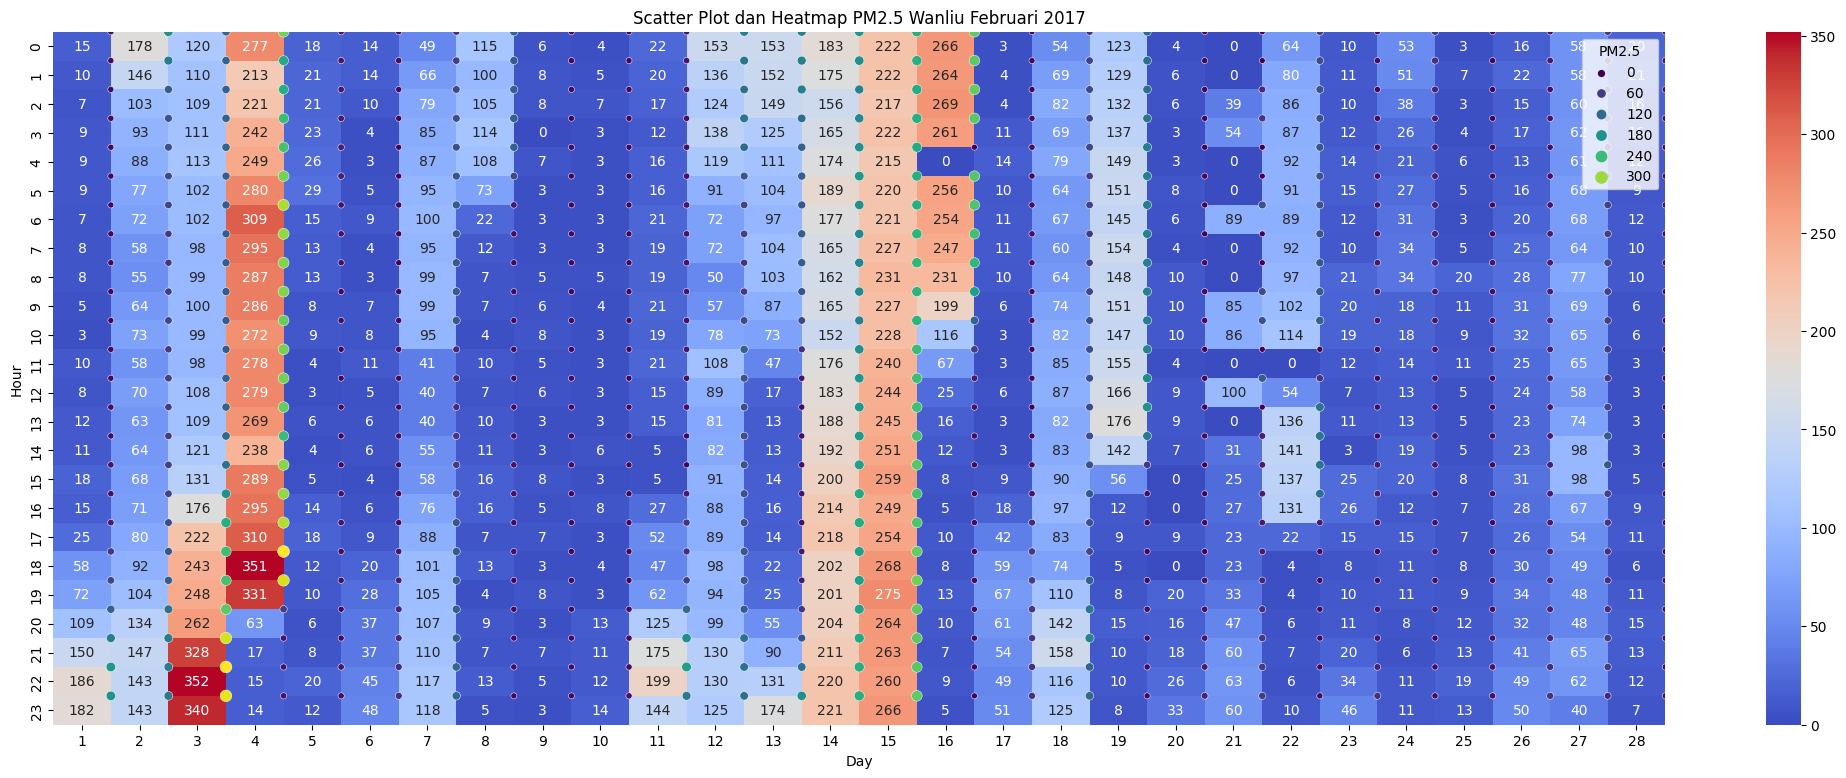

In [ ]:
plt.figure(figsize=(26, 9))
heatmap_data = filtered_data.pivot_table(index='hour', columns='day', values='PM2.5')
yticklabels = [str(i) for i in range(24)]
heatmap = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", yticklabels=yticklabels)

# Membuat scatter plot
sns.scatterplot(data=filtered_data, x='day', y='hour', hue='PM2.5', palette='viridis', size='PM2.5')

plt.title('Scatter Plot dan Heatmap PM2.5 Wanliu Februari 2017')
plt.xlabel('Day')
plt.ylabel('Hour')

plt.show()

#pada tanggal 8 pkl 8 pagi sampai 10 pukul 19 waktu setempat kadar pm2.5 rendah.tgl 9 kamis, 10 jumat, 11 sabtu 12 minggu. Untuk hubungan antara hujan dan pm2.5 mungkin tidak berhubungan karena ketika hujan turun pada tanggal 21 sekitar pkl 13 polusi pm2.5 tidak turun sugnifikan.


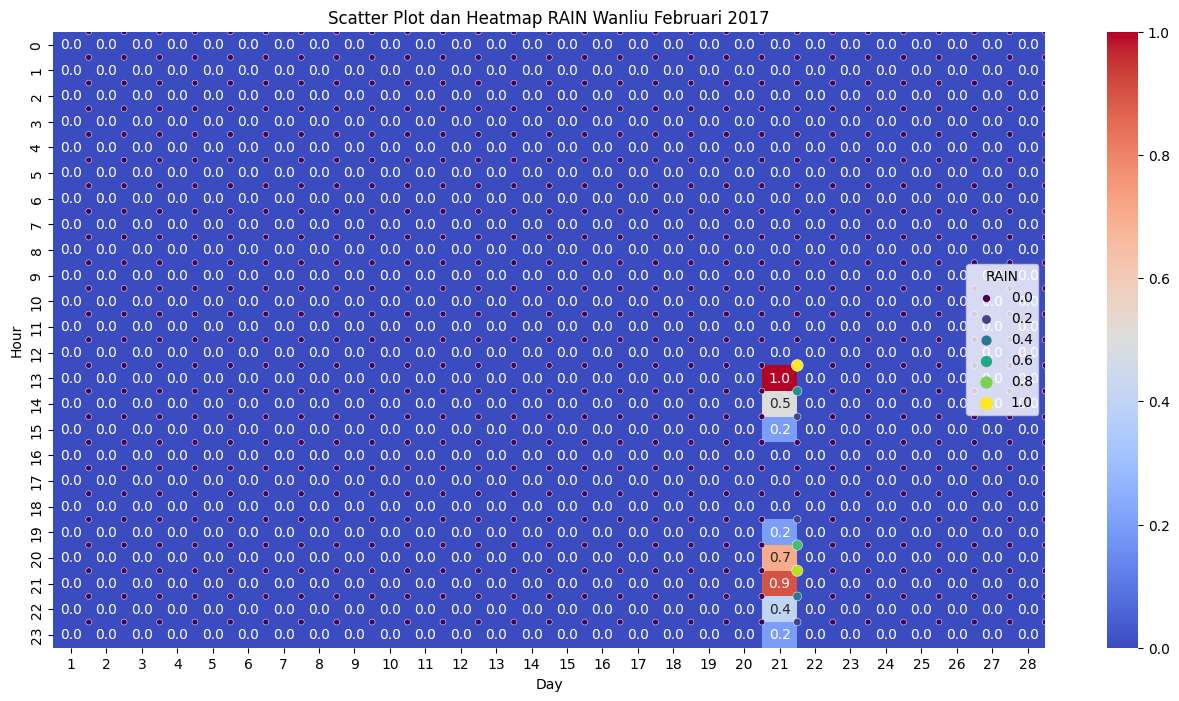

In [ ]:
plt.figure(figsize=(16, 8))
heatmap_data = filtered_data.pivot_table(index='hour', columns='day', values='RAIN')
yticklabels = [str(i) for i in range(24)]
heatmap = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", yticklabels=yticklabels)

# Membuat scatter plot
sns.scatterplot(data=filtered_data, x='day', y='hour', hue='RAIN', palette='viridis', size='RAIN')

plt.title('Scatter Plot dan Heatmap RAIN Wanliu Februari 2017')
plt.xlabel('Day')
plt.ylabel('Hour')

plt.show()


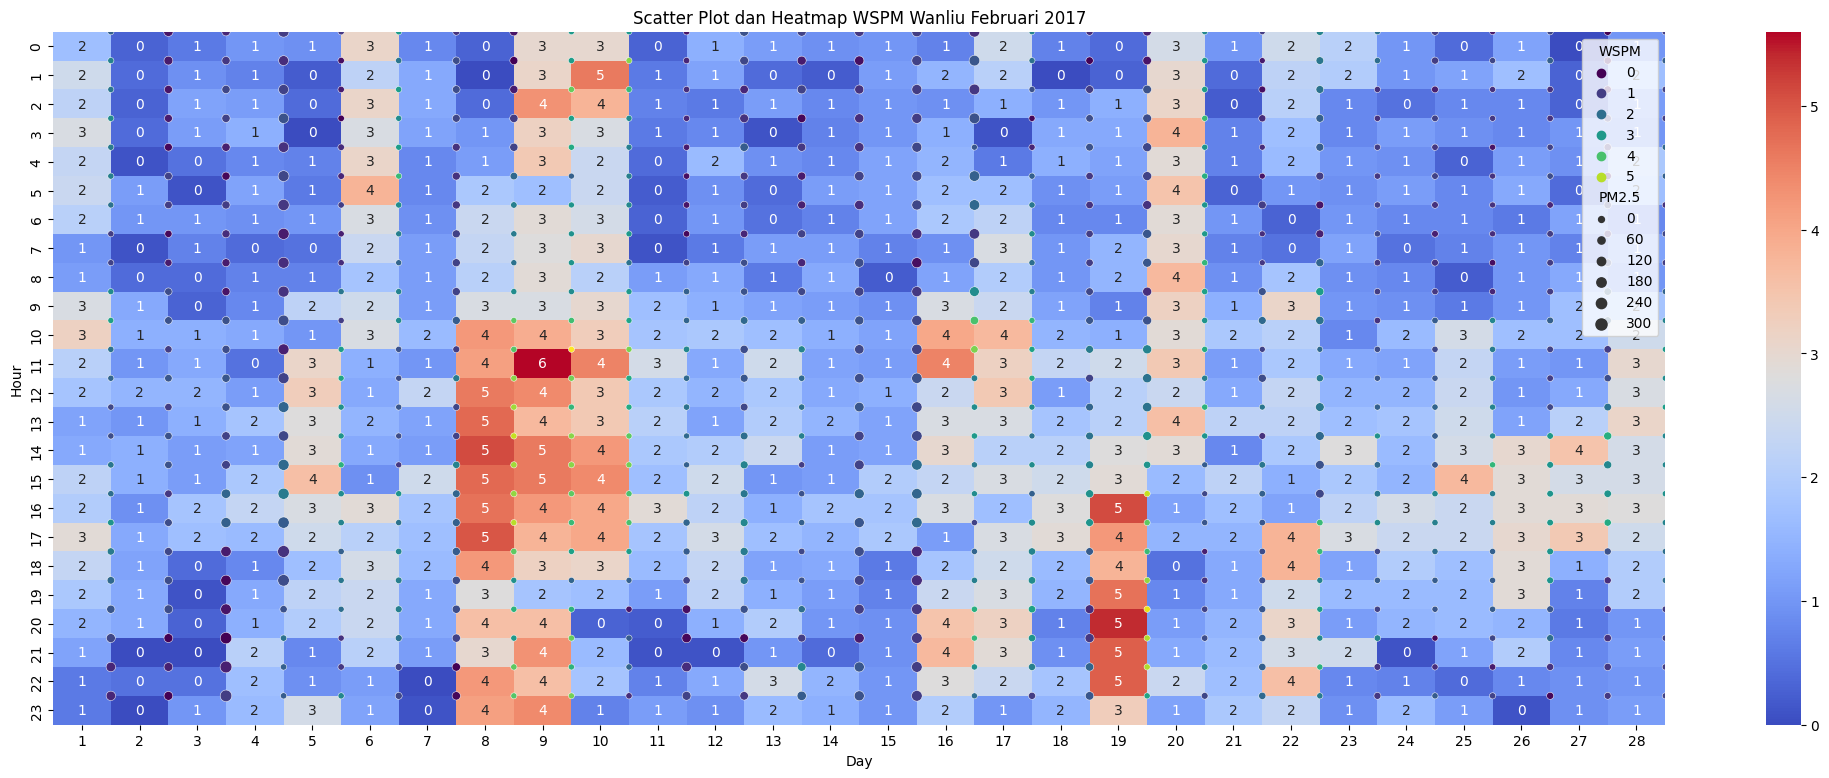

In [ ]:
plt.figure(figsize=(26, 9))
heatmap_data = filtered_data.pivot_table(index='hour', columns='day', values='WSPM')
yticklabels = [str(i) for i in range(24)]
heatmap = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", yticklabels=yticklabels)

# Membuat scatter plot
sns.scatterplot(data=filtered_data, x='day', y='hour', hue='WSPM', palette='viridis', size='PM2.5')

plt.title('Scatter Plot dan Heatmap WSPM Wanliu Februari 2017')
plt.xlabel('Day')
plt.ylabel('Hour')

plt.show()

## Visualization & Explanatory Analysis

In [ ]:
# Menghitung korelasi Pearson antara PM2.5 dan WSPM
korelasi = df_2017['PM2.5'].corr(df_2017['WSPM'])

# Menampilkan hasil korelasi
print("Korelasi antara PM2.5 dan WSPM:", korelasi)



Korelasi antara PM2.5 dan WSPM: -0.384387687658842


### Pertanyaan 1:



### Pertanyaan 2:

In [ ]:
#jumlah hujan dalam bulan februari 2017 di Wanliu adalah





### Pertanyaan 3:

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2